Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,796,163 (182.33 MB)

 Trainable params: 47,796,163 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7437 - loss: 2.2179 - val_accuracy: 0.8930 - val_loss: 0.2744
Epoch 2/10
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9308 - loss: 0.1996 - val_accuracy: 0.9395 - val_loss: 0.1933
Epoch 3/10
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9763 - loss: 0.0736 - val_accuracy: 0.9233 - val_loss: 0.2151
Epoch 4/10
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.9930 - loss: 0.0285 - val_accuracy: 0.9093 - val_loss: 0.3514
Epoch 5/10
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9947 - loss: 0.0189 - val_accuracy: 0.9581 - val_loss: 0.1545
Epoch 6/10
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9994 - loss: 0.0039 - val_accuracy: 0.9326 - val_loss: 0.2953
Epoch 7/10
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9988 - loss: 0.0056 - val_accuracy: 0.9419 - val_loss: 0.2388
Epoch 8/10
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 1.0000 -

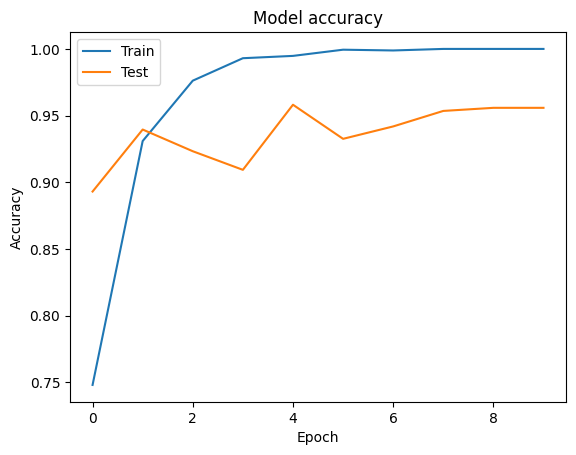

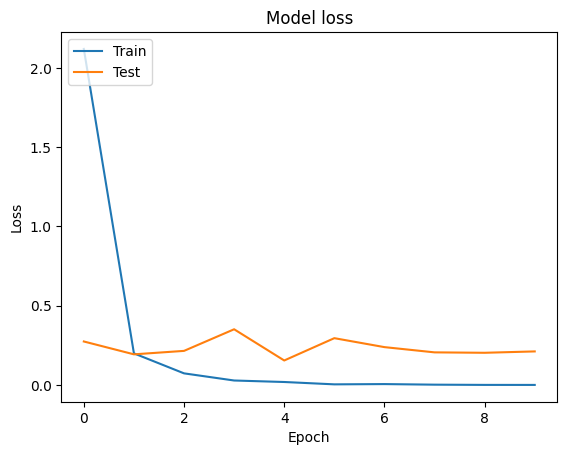

In [2]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers

# data preprocessing
base_dir = 'Dataset'

# parameters
img_size = 224

# image data generators

data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)



# Train Generator
train_generator= data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    subset='training',
    class_mode='categorical'
)

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    subset='validation',
    class_mode='categorical'
)


# model defining 
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

# Compile the Model
optimizer = optimizers.Adam(learning_rate=0.001)  # Define an optimizer with a learning rate
loss = 'categorical_crossentropy'

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples, # Number of steps per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples # Validation steps
)

# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# predictive system
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

class_indices

# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

# end code
model.save('potato.h5')

